# The Need for Quantization



### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

Although statistical mechanics works extremely well generally, there are places where its predictions appear to break down. It's not statistical mechanics that has a problem, but rather our modeling of the systems using "classical" physics. 

We can rescue the situation by introducing the idea that the permitted energies for systems are not completely continuous, but instead *discrete*. Let's look at some situations.

## Heat Capacities

For an ideal gas, the total kinetic energy of the gas is found to be (either from the kinetic theory of gases, or from the Sackur-Tetrode equation):

$$ E = \frac{3}{2}N k_B T $$

which means that the heat capacity at constant volume, i.e. the amount of energy it takes to raise the temperature $T$ by a certain amount, is given by

$$ \begin{align*}
\Delta T &= \Delta E/C_V\\
C_V &= \frac{\Delta E}{\Delta T} = \frac{3}{2}N k_B = \frac{3}{2} n R
\end{align*}
$$

* Well respected for the monatomic noble gases (helium, neon, and so on)
* Generally quite wrong for diatomic gases, like nitrogen or carbon monoxide.  

So far we have ignored rotational and vibrational kinetic energy of the molecules. This ought to count as much as translational kinetic energy, so we have a reason that the heat capacity could be wrong: there are other places energy can go

A diatomic gas could be expected to have 7 degrees of freedom which matter:

| Source | d.o.f. |
| ------ | ------ |
| Translational KE | 3 (x, y, z) |
| Rotational KE | 2 (rotation around axis joining atoms is ignored, to be discussed later) |
| Vibrational KE | 1 (relative velocity of atoms) |
| Vibrational PE | 1 (separation of atoms) |

So we might expect diatomic molecules to have $C_V = \frac{7}{2} n R$. Let's look at the values for real gases at standard conditions.

In [1]:
# Here we will generate plots of the heat capacity of various elements
# data are from NIST, documented on data.gov:
# https://catalog.data.gov/dataset/the-nbs-tables-of-chemical-thermodynamic-properties-selected-values-for-inorganic-and-c1-a
import pandas
df = pandas.read_csv('https://data.nist.gov/od/ds/mds2-2124/NBS_Tables_with_ErratumValues.csv',
                    header=1, index_col='Formula')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 60
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
import math
import numpy

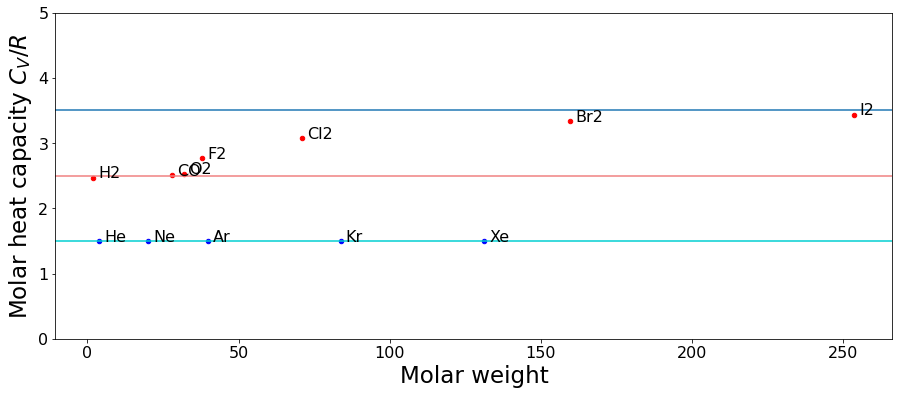

In [15]:
R=8.314 # J/mol K
# Select noble gases in the gaseus state, force the columns we want to be a float
noble_gases = df[df['State']=='g'].loc[['He', 'Ne', 'Ar', 'Kr', 'Xe']].astype({'Cp\nJ mol-1 K-1': 'float', 'Molar Mass\ng mol-1': 'float'})
#print(noble_gases)
# The following is heat capacity at *constant pressure* - which is the *constant volume* heat capacity + one
noble_gases['Cv/R']=noble_gases['Cp\nJ mol-1 K-1']/R-1
# Select some other gases, force the columns we want to be a float
other_gases = df[df['State']=='g'].loc[['H2', 'O2', 'CO', 'Cl2', 'F2', 'Br2', 'I2']].astype({'Cp\nJ mol-1 K-1': 'float', 'Molar Mass\ng mol-1': 'float'})
other_gases['Cv/R']=other_gases['Cp\nJ mol-1 K-1']/R-1
fig, ax = plt.subplots(figsize=(15,6))
other_gases.plot(x='Molar Mass\ng mol-1', y='Cv/R', kind='scatter', color='r', ax=ax)
noble_gases.plot(x='Molar Mass\ng mol-1', y='Cv/R', kind='scatter', color='b', ax=ax)#, figsize=(8,6))
for row in noble_gases.itertuples():
    ax.annotate(row.Index, (row._5, row._13), xytext=(5, 0), textcoords='offset points')
for row in other_gases.itertuples():
    ax.annotate(row.Index, (row._5, row._13), xytext=(5, 0), textcoords='offset points')
plt.ylabel('Molar heat capacity $C_V/R$', fontsize='x-large')
plt.xlabel('Molar weight', fontsize='x-large')
plt.axhline(1.5, color='darkturquoise')
plt.axhline(2.5, color='lightcoral')
plt.axhline(3.5)
ax.set_ylim(0,5)
plt.show()

* the noble gases do indeed cluster at $3/2$
* diatomic gases range from $\sim 2.5$ to $\sim 3.5$, where the heavier the gas molecules are, the closer the values get to $3.5$

It's as if certain degrees of freedom are not fully accessible for the lighter molecules.

Looking at the heat capacity as a function of temperature shows us something interesting:

[![Specific heat vs T](images/DiatomicSpecHeat2.png)](https://en.wikipedia.org/wiki/Molar_heat_capacity#/media/File:DiatomicSpecHeat2.png)

The heat capacity increases with $T$ and there seem to be plateaus in various places. Hydrogen in fact dips below $5/2$ at a point. The general observed pattern looks like this:

[![Specific heat vs T](images/DiatomicSpecHeat1.png)](https://en.wikipedia.org/wiki/Molar_heat_capacity#/media/File:DiatomicSpecHeat1.png)

It seems that certain kinds of motion appear to not be able to take the full $\frac{1}{2} k_B T$ per degree of freedom until the temperature $T$ gets high enough.  
* in classical mechanics this makes no sense: I can always rotate an object arbitrarily slowly, so that it has $\frac{1}{2} k_B T$ of energy. 
* in the new _quantum_ theory, there is an _energy gap_ between the lowest energy state (no rotation) and the first state with higher energy than that (with non-zero rotation); **it is not possible to rotate arbitrarily slowly**. Similarly there is an energy gap between the lowest vibrational energy state and the first vibrating state; **it is not possible to have a vibration of arbitrarily small magnitude**. Because of this, if $k_B T$ falls below the size of this energy gap, it is very unlikely for the molecule to rotate or vibrate at all, and instead it is locked in the lowest energy state: that degree of freedom is said to be _frozen out_.  Experimentally it is found that the energy gap for rotation is lower than the energy gap for vibration, and that the energy gap gets bigger as the masses get smaller.

A similar effect is seen for solids, which the Dulong-Petit law says should have heat capacity $\sim 3R$. The following plot shows the heat capacity (specific heat) for silver (Dulong-Petit predicts $C \sim 24.9$ J/mol K $\sim 233$ J/kg K):

[![Specific heat of silver](images/silver_specheat.jpg)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4887198)

At room temperature silver's heat capacity is the Dulong-Petit value, but it falls as energy decreases.  Einstein made a model of a solid (the so-called *Einstein solid*):
* a set of atoms with (uncorrelated) simple harmonic motion around their equilibrium positions
* require that the energy of each atom above the lowest energy state is a value $Mh\nu$, where $M$ is an integer, $\nu$ is the frequency of the oscillator, and $h$ is a constant which we'll get to in a bit

In an Einstein solid, since there is a minimum energy above the ground state $h\nu$, if the total energy of the system is low enough, some atoms will be totally locked out of motion because there won't be enough total energy to give all atoms at least $h\nu$ energy.  Therefore a similar freezing out effect occurs as for ideal gases.

The common thread in all these cases is the idea that some kinds of motion cannot be infinitesimally small, but in fact show a well-defined gap between the lowest energy state and the next state with higher energy.

## The Ultraviolet Catastrophe

Let's consider a very simple model that shows this problem.  Consider two parallel metal plates at $x=0$ and $x=L$, and allow the space in between to be filled by electromagnetic waves (only in one dimension, for simplicity). The standing waves have the form

$$ \psi(x) = \sin \left(\frac{2\pi x}{\lambda} + \phi_0\right) $$

so that for $x = \lambda$ the function equals its value at $x=0$, i.e. it is periodic. The standing waves must have nodes at the two plates, so $\psi(0) = \psi(L) = 0$, which requires that the argument of the $\sin$ function must be equal to $n\pi$. In other words, the standing waves must satsify

$$ \frac{2\pi L}{\lambda_n} = n\pi \Rightarrow \lambda_n = \frac{2L}{n}\$$

where $n$ is some integer and $\lambda$ is the wavelength. Equivalentlly we can write this in terms of the frequency, $\nu = c/\lambda$:

$$ \nu_n = \frac{n c}{2L} $$


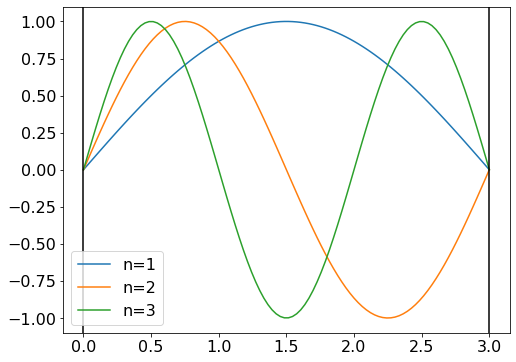

In [15]:
L=3
pts = numpy.linspace(0,L,100)
for n in range(1,4):
    lambda_n = 2*L/n
    plt.plot(pts, numpy.sin(2*math.pi*pts/lambda_n), label=f'n={n}')
plt.axvline(0, color='black')
plt.axvline(L, color='black')
plt.legend()
plt.show()


Each of the $n$ corresponds to an independent electromagnetic wave (or *mode*), and it turns out that we should assign $2 \times \frac{1}{2} k_B T$ of energy via the equipartition principle to each one.  But there are infinitely many $n$! If all modes satisfy the equipartition principle we should have an infinite amount of electromagnetic energy between the plates!

This probably feels like a very weird result. It's unlike the ideal gas for one key reason: there are an infinite number of potential electromagnetic waves, while there are a finite number of particles in an ideal gas.
* when applying the equipartition principle to an ideal gas the number of possible degrees of freedom there is *finite* although very large (e.g. 3 times the number of atoms). When adding more energy to an ideal gas, it has to change the energy of an existing molecule.  
* each electromagnetic wave mode is independent of all the others (think how a radio can be tuned to pick out one particular frequency), and there are an infinite number of modes (the frequencies can get arbitrarily large). So when adding energy to the electromagnetic cavity, we could always find some previously-unexcited mode to excite.

The result in three dimensions has the same problem, only worse.  The energy density per unit volume, for modes with frequency between $\nu$ and $\nu+d\nu$, is found to be

$$ g(\nu)\ d\nu = \frac{8 \pi k T\nu^2}{c^3} d\nu$$

which gets bigger and bigger as $\nu$ increases - the integral of this is clearly infinite.  (This calculation of the energy density is called the *Rayleigh-Jeans Law*.)  This result is actually found to be accurate for sufficiently low frequencies, but fails quickly at high frequencies.

These electromagnetic cavities are a model for the radiation emitted by so-called _black bodies_ (named because they absorb all incoming radiation, and reflect none), or in general, thermal radiation emission.  The thermal radiation spectrum depends only on temperature and is seen in many places, from stars to people to the "cosmic microwave background" that fills the universe. (It's called thermal radiation because it arises from the heat of objects exciting electromagnetic radiation; it's just normal electromagnetic radiation otherwise.)

https://en.wikipedia.org/wiki/Planck%27s_law#/media/File:Black_body.svg


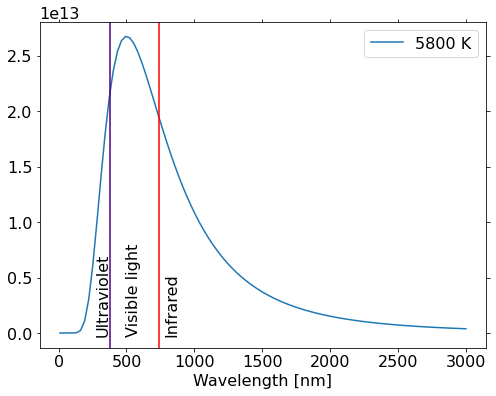

In [7]:
h = 6.63e-34
c = 3e8
k_B = 1.380649e-23
# Planck spectrum in terms of frequency
def planck_f(T, f):
    return 2*h*f**3/c**2/(numpy.exp(h*f/(k_B*T))-1)
# Planck spectrum in terms of wavelength
def planck_lambda(T, l):
    return 2*h*c**2/l**5/(numpy.exp(h*c/(l*k_B*T))-1)

# wavelength, in nanometers
pts=numpy.linspace(10, 3000, 100)

# 5800 K = Sun
plt.plot(pts, planck_lambda(5800,pts*1e-9), label='5800 K')
# 3300 K = Betelgeuse
#plt.plot(pts, planck_lambda(3300,pts*1e-9), label='3300 K')
# 1800 K = molten iron
#plt.plot(pts, planck_lambda(1800,pts*1e-9), label='1800 K')
# 315 K = person
#plt.plot(pts, planck_lambda(315,pts*1e-9), label='315 K')
# 2.725 K = cosmic microwave background
#plt.plot(pts, planck_lambda(2.725,pts*1e-9), label='2.725 K')
plt.xlabel('Wavelength [nm]')
plt.axvline(380, color='indigo')
plt.axvline(740, color='red')
plt.text(500, 0, 'Visible light', rotation='vertical')
plt.text(270, 0, 'Ultraviolet', rotation='vertical')
plt.text(780, 0, 'Infrared', rotation='vertical')
plt.legend()
plt.show()

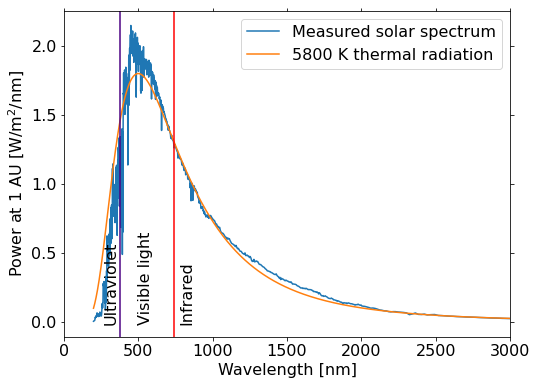

In [94]:
import pandas
# Solar spectrum (measured outside the atmosphere) from https://www.nrel.gov/grid/solar-resource/spectra.html
solarspectrum=pandas.read_csv('https://www.nrel.gov/grid/solar-resource/assets/data/wehrli85.txt', 
                                delim_whitespace=True, dtype='float32')
# normalize plots to same area; use trapezoidal rule to find area
integral_measured = numpy.trapz(solarspectrum['W/sm/nm'], solarspectrum['nm'])
plt.plot(solarspectrum['nm'], solarspectrum['W/sm/nm'], label='Measured solar spectrum')
pts_predicted = planck_lambda(5800,solarspectrum['nm']*1e-9)
integral_predicted = numpy.trapz(pts_predicted, solarspectrum['nm'])
plt.plot(solarspectrum['nm'], pts_predicted/integral_predicted*integral_measured, label='5800 K thermal radiation')
plt.xlim(0,3000)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Power at 1 AU [W/m$^2$/nm]')
plt.axvline(380, color='indigo')
plt.axvline(740, color='red')
plt.text(500, 0, 'Visible light', rotation='vertical')
plt.text(270, 0, 'Ultraviolet', rotation='vertical')
plt.text(780, 0, 'Infrared', rotation='vertical')
plt.legend()
plt.show()

Planck managed to reconcile theory with the actual observed distribution by assuming that the energy in each electromagnetic radiation mode had to be $Nh\nu = Nhc/\lambda$, with $N$ an integer, $\nu$ the frequency of the mode, and $h$ a constant, which turns out to be the same as what Einstein needed to use in his model. In his honor $h$ is called *Planck's constant*.

### Wien displacement law, estimating Planck's constant
The core idea of Planck was that if the energy in each mode is quantized - so higher frequency (smaller wavelength) modes eventually require energy much bigger than $k_B T$ to have any excitation at all - then there is a natural cutoff on the Rayleigh-Jeans law.  Classically, we assume that all electromagnetic radiation modes can have arbitrary small energy, so they can all take energy $k_B T$, but in the quantum theory, there is no excitation of energy less than $h\nu$, so the high frequency modes are frozen out.

There is an empirical result called the _Wien displacement law_ that says that the wavelength of the peak of the radiation curve is related to temperature via

$$ \lambda_\mathrm{peak} = \frac{2.9\times 10^{-3}\textrm{ m}\cdot\textrm{K}}{T} $$

To make a very rough estimate of $h$, let us assume that the peak occurs at the wavelength where $k_B T$ of energy is just able to excite the mode, i.e. it's just equal to $h\nu = hc/\lambda$.  (This is an extreme approximation, but should be correct within an order of magnitude.) We find

$$\frac{hc}{\lambda_\mathrm{peak}} \sim k_B T$$
$$h \sim \frac{k_B T\lambda_\mathrm{peak}}{c} = \frac{k_B T}{c}\frac{2.9\times 10^{-3}\textrm{ m}\cdot\textrm{K}}{T} = \frac{k_B}{c} (2.9\times 10^{-3}\textrm{ m}\cdot\textrm{K})$$

Plugging in numbers, we get $h \sim 10^{-34}$ J s.

## More quantization: the Photoelectric Effect

In the mid-1800s it was found that light shining on metals could cause emission of negative charge from the metals; this is called the *photoelectric effect*. In the late 1800s it was found that the emission was of *electrons* (or "cathode rays") and the properties of the emitted electrons could be studied.  There are some interesting properties observed:
* photoemission does not happen if the frequency of light is too low (wavelength is too long).  Every metal has its own characteristic minimum frequency below which emission does not occur.
* the more intense the light, the more electrons are emitted (but only if the frequency is high enough that any are emitted at all).
* the maximum kinetic energy of the emitted electrons increases with the frequency of light, but has no dependence on intensity,
* emission begins imeediately once light starts shining.

In classical electromagnetism, the energy density of the light depends only on the intensity. So it would predict
* equivalently bright light should cause equivalent amounts of photoemission regardless of wavelength,
* the maximum kinetic energy of the electrons should depend on the light intensity, not wavelength,
* there could in principle be an "accumulation" period for electrons to absorb enough energy from dim light before escaping the material, but for sufficiently low intensity this could take a long time.

This contradicts observation. However, we (or Einstein) can adapt Planck's solution to the ultraviolet catastrophe to this problem. We assume that
* electromagnetic radiation of a specific frequency has energy $Nh\nu$, where $\nu$ is the frequency and $N$ is the number of "quanta" (known as *photons*),
* light is more intense because there are more quanta,
* electrons can only interact with a single light quantum at a time (i.e., they can only absorb energy $h\nu$ from the electromagnetic field at once),
* electrons need to absorb a fixed energy $W$ (called the "work function", which depends on the metal) before they can escape the material.

This immediately explains the observations:
* photoemission cannot happen if the work function $W$ is larger than $h\nu$, and the threshold frequency for photoemission to start is $\nu = W/h$;
* more intense light means that there are more quanta, which can interact with more electrons, but only if their frequency is high enough;
* the maximum kinetic energy of the electrons is the energy they absorb from the light quanta minus the work function ($h\nu-W$) which increases as $\nu$ increases - in fact, linearly. But since a single absorption does not depend on the total number of quanta, it does not depend on light intensity;
* because single quanta are absorbed (there is no accumulation process) emission can begin immediately once light shines on the material.


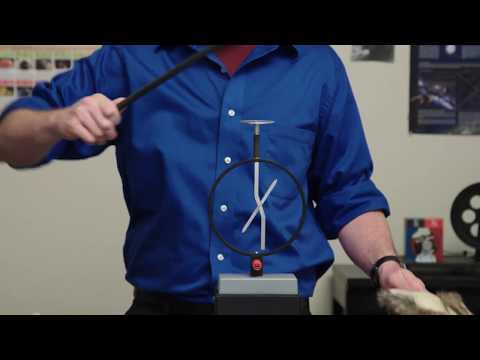

In [1]:
from IPython.display import YouTubeVideo, HTML
YouTubeVideo('l-gwAs2ApPw', width=1179, height=663, rel=0)

The Einstein model for the photoelectric effect predicts a linear relationship between the frequency of the incident light and the maximum energy of emitted electrons. This was confirmed spectacularly by Millikan:

[![Millikan E vs nu](images/millikan_h.png)](https://journals.aps.org/pr/pdf/10.1103/PhysRev.7.355)

By applying a negative voltage to the metal, he could give the electrons a little additional energy (effectively, decrease $W$) and lower the minimum frequency needed for electrons to be emitted.

In summary:

* Multiple physical systems indicate that certain kinds of energy cannot take on arbitrarily small values:
 * the heat capacity of gases and solids suggest that certain motions are "frozen out" at low temperature;
 * the electromagnetic radiation in a box does not contain infinitely high frequency modes;
 * light hitting a metal needs to have a minimal frequency before it can cause electrons to be emitted.

## Aside: the Cosmic Microwave Background

About 380,000 years after the Big Bang, the ionized plasma of protons and electrons combined to form (mostly) hydrogen and helium atoms. Suddenly, light could travel freely, and we can see this light today. The light was emitted with a thermal spectrum corresponding to the temperature of the universe when the recombination happened. This has since been "red shifted" so it now corresponds to a black body at 2.725 K. Some regions of the universe were slightly warmer or cooler and these can be seen as shifts in the black body spectrum of the _cosmic microwave background_.

![Planck image of the Cosmic Microwave Background](images/Planck_CMB.jpg)